[Pillow 사용법 - Basic 01](https://ds31x.tistory.com/465)

## Pillow 기본 사용법

### 주요 함수 및 메서드

1. **`Image.open(fp)`** - 이미지 파일 열기
   - 파일 경로(문자열 또는 Path 객체)를 받아 `PIL.Image.Image` 객체 반환
   - 다양한 이미지 형식 자동 감지

2. **`Image.new(mode, size, color=0)`** - 새 이미지 생성
   - mode: 이미지 모드 ('RGB', 'RGBA', 'L' 등)
   - size: (width, height) 튜플
   - color: 초기 색상값 (기본값 0)

3. **`save(fp, format=None, **params)`** - 이미지 저장
   - quality 옵션으로 JPEG 품질 조절 가능

4. **`split()`** - 채널 분리
   - 이미지를 채널별로 분리하여 튜플로 반환

5. **`Image.merge(mode, bands)`** - 채널 병합
   - 분리된 채널들을 합쳐 하나의 이미지 생성

6. **`convert(mode)`** - 이미지 모드 변환
   - 다른 색상 공간으로 변환

7. **`crop(box)`** - 이미지 자르기
   - box: (left, top, right, bottom) 튜플

8. **`resize(size, box=None)`** - 크기 조정
   - size: (width, height) 튜플
   - box: 자를 영역 지정 가능

9. **`rotate(angle, expand=False, fillcolor=None)`** - 회전
   - angle: 회전 각도 (반시계방향)
   - expand: 전체 이미지를 담을 수 있도록 캔버스 확장 여부
   - fillcolor: 빈 영역 색상

---


In [1]:
from skimage import data
from PIL import Image

In [32]:
img_array = data.chelsea()
img_array.shape

(300, 451, 3)

# from ndarray to Image

In [33]:
img = Image.fromarray(img_array)

# save() 메서드

### 1. 이미지 파일 열기 (`Image.open`)

파일로부터 이미지를 읽어와 `PIL.Image.Image` 객체를 생성합니다.


In [34]:
fstr = 'output_pil.jpg'

img.save(
    fstr,
    format='JPEG',
    quality=80,
    )


In [35]:
from pathlib import Path

p = Path(fstr)
fsize_bytes = p.stat().st_size
fsize_bytes

23693

# open 함수

### 2. 이미지 표시 방법

- **Matplotlib**: `plt.imshow(img)` - 일반적인 방법
- **Colab**: 셀 마지막에 Image 객체만 평가(evaluate)해도 표시됨
- **`show()` 메서드**: 독립된 창으로 표시 (Colab에서는 동작 안함)


In [36]:
n_img = Image.open(fstr)
type(n_img)

PIL.JpegImagePlugin.JpegImageFile

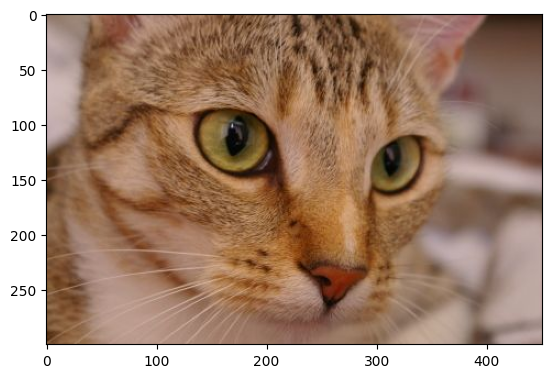

In [37]:
import matplotlib.pyplot as plt

plt.imshow(n_img)
plt.show()

In [38]:
n_fstr = Path('test.jpg')

n_img.save(n_fstr)
n_img = Image.open(n_fstr)
type(n_img)

PIL.JpegImagePlugin.JpegImageFile

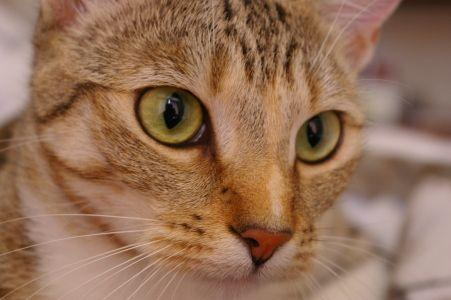

In [39]:
n_img # colab에선 그냥 evaluate로도 이미지가 보임.

In [40]:
n_img.size # width, height

(451, 300)

### 3. 색상 모드와 채널 분리/병합

**주요 색상 모드:**
- `L`: 8-bit 흑백 (0-255)
- `RGB`: 24-bit 트루컬러 (R, G, B 각 8bit)
- `RGBA`: 32-bit 트루컬러 + 알파채널
- `CMYK`: 인쇄용 색상 모드
- `HSV`: 색상, 채도, 명도

**채널 작업:**
- `split()`: 이미지를 채널별로 분리
- `Image.merge()`: 채널들을 합쳐서 하나의 이미지 생성


In [41]:
colorspaces = {
  'L': '8-bit 흑백 (0-255)',
  '1': '1-bit 흑백 (0 또는 255)',
  'P': '8-bit 팔레트 모드',
  'RGB': '24-bit 트루컬러 (8bit x 3채널)',
  'RGBA': '32-bit 트루컬러 + 알파채널',
  'CMYK': '32-bit 컬러 (8bit x 4채널)',
  'YCbCr': 'JPEG 표준 색상공간',
  'LAB': 'CIE Lab 색상공간',
  'HSV': 'Hue, Saturation, Value'
}

for mode, _ in colorspaces.items():
  try:
    print(f'{mode}: {n_img.convert(mode).getbands()}')
  except Exception as e:
    print(f'Convert Erropr: {mode=}\n{e}')


L: ('L',)
1: ('1',)
P: ('P',)
RGB: ('R', 'G', 'B')
RGBA: ('R', 'G', 'B', 'A')
CMYK: ('C', 'M', 'Y', 'K')
YCbCr: ('Y', 'Cb', 'Cr')
LAB: ('L', 'A', 'B')
HSV: ('H', 'S', 'V')


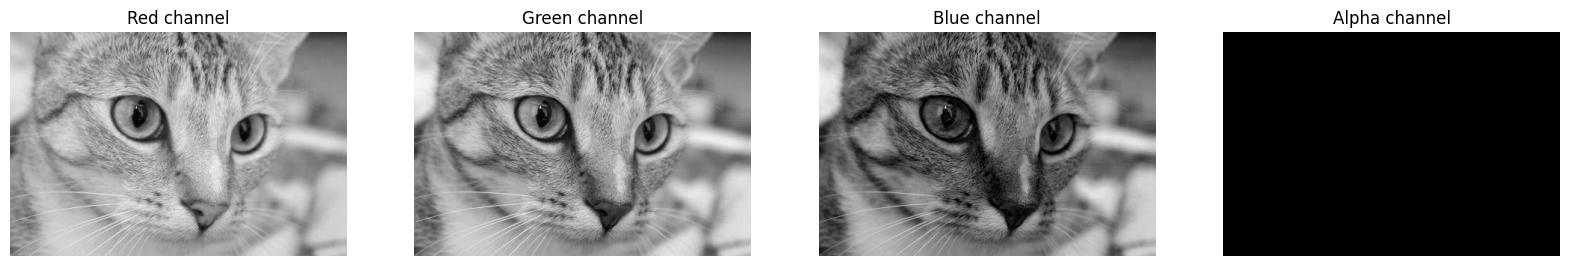

In [42]:
# Convert the image to RGBA
rgba_img = n_img.convert('RGBA')

# Split the RGBA image into individual channels
r, g, b, a = rgba_img.split()

# Display each channel
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(r, cmap='gray')
axes[0].set_title('Red channel')
axes[1].imshow(g, cmap='gray')
axes[1].set_title('Green channel')
axes[2].imshow(b, cmap='gray')
axes[2].set_title('Blue channel')
axes[3].imshow(a, cmap='gray')
axes[3].set_title('Alpha channel')

for ax in axes:
    ax.axis('off')

plt.show()

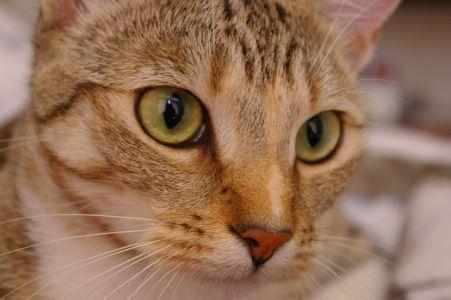

In [43]:
img = Image.merge('RGBA',(r,g,b,a))
img

('L',)


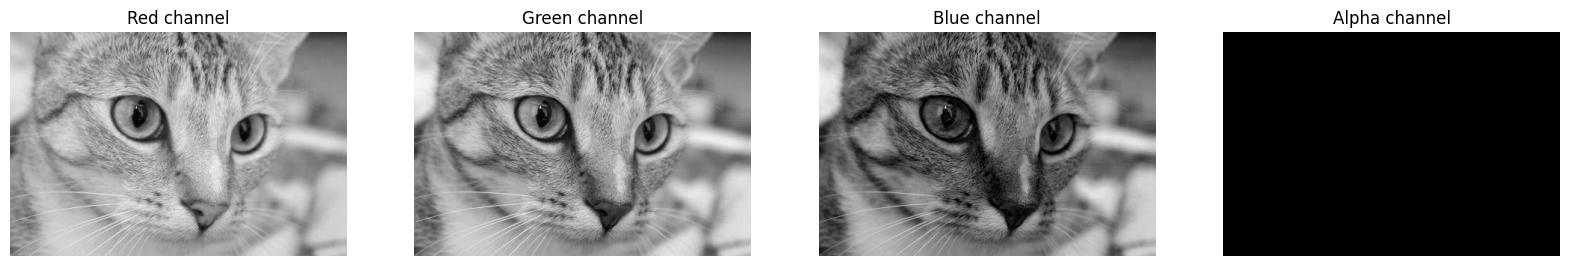

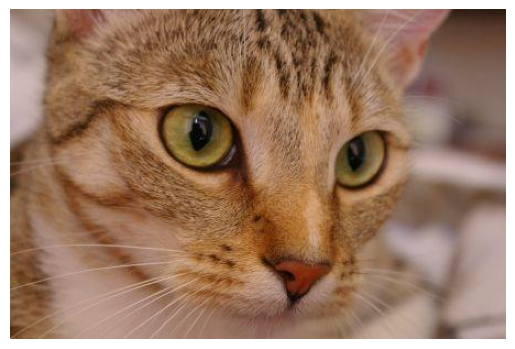

In [16]:
# Convert the image to RGBA
rgba_img = n_img.convert('RGBA')

# Split the RGBA image into individual channels
r, g, b, a = rgba_img.split()

print(r.getbands())

# Display each channel
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(r, cmap='gray')
axes[0].set_title('Red channel')
axes[1].imshow(g, cmap='gray')
axes[1].set_title('Green channel')
axes[2].imshow(b, cmap='gray')
axes[2].set_title('Blue channel')
axes[3].imshow(a, cmap='gray')
axes[3].set_title('Alpha channel')

for ax in axes:
    ax.axis('off')

plt.show()

img = Image.merge('RGBA',(r,g,b,a))
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

# Pixel Access

In [57]:
n_img.getpixel( (50,50) )

(137, 101, 67)

### 4. 픽셀 접근 (Pixel Access)

**개별 픽셀 접근:**
- `getpixel((x, y))`: 특정 위치의 픽셀 값 읽기
- `putpixel((x, y), color)`: 특정 위치의 픽셀 값 변경

**전체 픽셀 접근:**
- `load()`: `PixelAccess` 객체 반환
- 인덱싱을 통해 빠른 픽셀 접근 가능 (`pixels[x, y]`)


In [60]:
n_img.putpixel((50,50), (255,0,0))
n_img.getpixel((50,50))

(255, 0, 0)

type(pixels) = <class 'PixelAccess'>


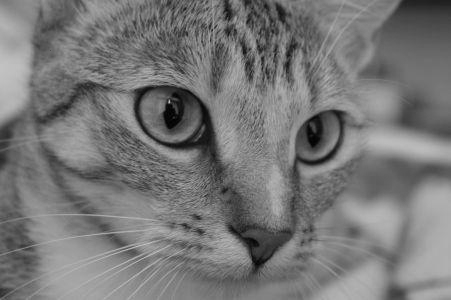

In [64]:
tmp = n_img.copy()

pixels = tmp.load()
print(f'{type(pixels) = }')
for y in range(tmp.height):
  for x in range(tmp.width):
    r,g,b = pixels[x,y]
    gray = int(0.299*r + 0.587*g + 0.114*b)
    pixels[x,y] = (gray,gray,gray)

tmp

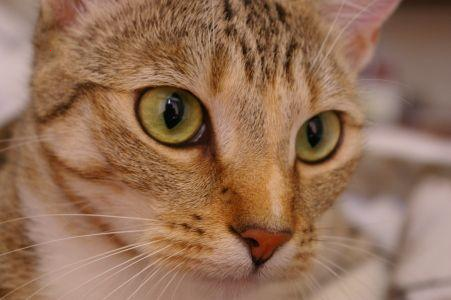

In [62]:
n_img

# Geometric Transform

In [44]:
cropped_image = n_img.crop(
    (100,100,250,150)
)

### 5. 기하학적 변환 (Geometric Transform)

**주요 변환 메서드:**
1. **`crop(box)`**: 이미지 자르기
   - box: (left, top, right, bottom)

2. **`resize(size, box=None)`**: 크기 조정
   - size: (width, height)
   - box를 지정하면 해당 영역만 자른 후 resize

3. **`rotate(angle, expand=False, fillcolor=None)`**: 회전
   - angle: 반시계방향 각도
   - expand=True: 잘리지 않도록 캔버스 확장
   - fillcolor: 빈 영역 채울 색상

4. **`transpose(method)`**: 회전/뒤집기
   - FLIP_LEFT_RIGHT, FLIP_TOP_BOTTOM
   - ROTATE_90, ROTATE_180, ROTATE_270
   - TRANSPOSE, TRANSVERSE


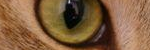

In [45]:
cropped_image

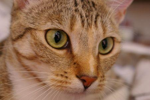

In [46]:
resized_img = n_img.resize(
	(150,100), # width, hegith.
)

resized_img

In [47]:
resized_img.size

(150, 100)

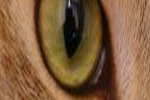

In [48]:
resized_img2 = n_img.resize(
    (150,100),
    box=(100,100,250,150),
)
resized_img2

In [49]:
resized_img2.size

(150, 100)

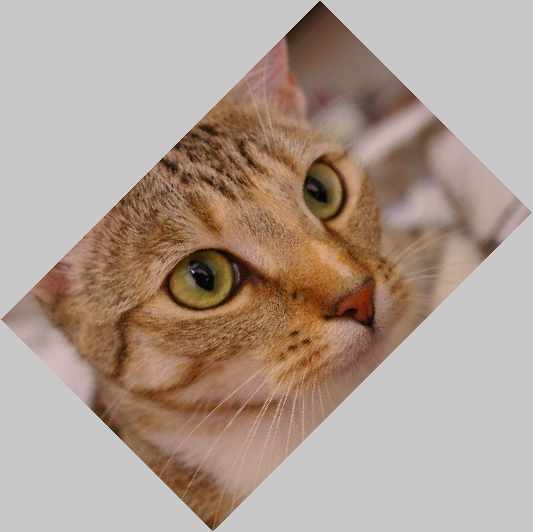

In [50]:
rotated = n_img.rotate(45, expand=True, fillcolor=(200,200,200))
rotated

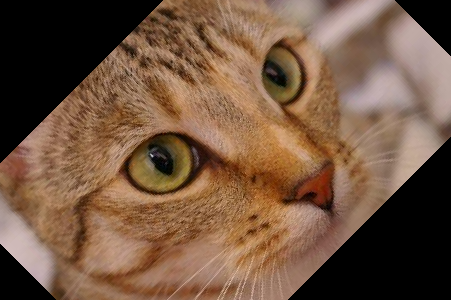

In [54]:
rotated = n_img.rotate(45) # alpha가 있고, 0인 경우 검은색이 아닌 흰색으로 채워짐.
rotated

In [52]:
rotated.getpixel( (0,0))

(0, 0, 0)

In [55]:
rotated.putpixel( (0,0), (200,200,200) )
rotated.getpixel( (0,0))

(200, 200, 200)

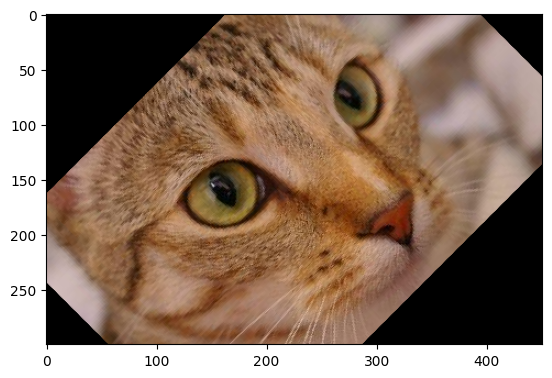

In [56]:
import matplotlib.pyplot as plt
plt.imshow(rotated)